<a href="https://colab.research.google.com/github/nathakhi/Predicting-Trouble-Sleeping/blob/main/predicting_trouble_sleeping_codebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Background
Sleep is considered to be one of the major determinants of health.  Inadequate sleep not only disrupts performing daily activities like concentrating on works, memorizing, driving, managing financial affairs but also poses the risk of several physical morbidities including cardiovascular, metabolic, endocrine dysfunction as well as mental health problems like depression or mood disorders when the sleep deprivation is chronic (Medic, Wille, & Hemels, 2017). Several studies have even established the relation between abnormal sleep behavior and mortality. There are several socio-economic, cultural, demographic, and health-related factors that can influence sleep quality. Here, I have tried to seek answers to a number of questions related to poor sleep quality among Canadian population- 


1. Determine some of the important indicators of poor sleep quality,
2. Whether there is difference in trouble sleeping among men and women,  
3. Build ML models to predict the probability of having trouble sleeeping or not.

**Data:**

Canadian Community Health Survey (2017-18) accessed via Ryerson Library from Statistics Canada

Target variable:
Trouble going to sleep or staying asleep (renamed as trouble_sleeping)
 
Predictor Variables used:  
- **sociodemographic**: Age, sex, marital status, have kids under 6 years of age, kids 6 to 11 years of age, kids under 12 years of age, immigration status, race  
- **socioeconomic**: Household income, personal income, education level, household size (no. of persons), house ownership  
- **lifestyle**: Smoking, Drinking, BMI, Physical activity indicators  
- **health variables**: Having asthma, COPD, High blood pressure, diabetes, cancer, mood disorder, anxiety disorder, self-reported perception of general and mental health, and satisfaction with life.

#Import libraries

In [ ]:
# Basic Python Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# statistical libraries
from scipy.stats import pearsonr, spearmanr
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2
from scipy.stats import chi2

In [ ]:
# Machine Learning libraries
from sklearn.model_selection import KFold, cross_val_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report


# Data Preprocessing

In [ ]:
#Reading Data file
raw_df=pd.read_csv('/content/cchs.csv')

In [ ]:
raw_df.head()

,GEO_PRV,DHH_SEX,DHHGMS,DHHDGHSZ,DHHDG611,DHHDGL12,DHHDGLE5,DHHGAGE,EHG2DVR3,EHG2DVH3,GEN_005,GEN_015,GENDVSWL,HWTDGISW,CCC_015,CCC_030,CCC_050,CCC_065,CCC_085,CCC_095,CCC_130,CCC_195,CCC_200,SLPG005,SLP_010,SMK_005,ALCDVTTM,PAADVACV,DHH_OWN,SDCDVIMM,SDCDGCGT,INCDGHH,INCDGPER,WTS_M
0,46,2,3,1,0,0,0,16,3,3,2,2,1,3,2,2,2,1,2,2,2,1,2,96,6,3,1,3,1,2,1,3,4,35.95
1,48,1,3,1,0,0,0,14,1,1,5,3,1,4,2,1,2,1,1,1,2,2,2,5,1,3,1,3,1,2,1,3,4,49.19
2,13,2,1,4,0,0,0,9,3,3,2,3,2,2,2,2,1,2,2,2,2,2,1,96,6,3,1,1,1,2,1,5,3,82.56
3,59,2,3,1,0,0,0,10,3,3,2,2,1,3,2,2,1,1,2,2,2,2,2,4,1,3,1,1,1,1,2,4,5,51.10
4,35,2,1,5,0,0,0,9,3,3,1,1,1,2,2,2,2,2,2,2,2,2,2,96,6,3,1,2,1,2,1,5,5,660.62


In [ ]:
#rename column names according to data dictionary
cchs_df=raw_df.rename(columns={"GEO_PRV":"province","DHH_SEX":"sex", "DHHGMS": "marital_status","DHHDGHSZ":"household_size",
                          "DHHDG611":"kids_6t011","DHHDGL12":"kids_under_12","DHHDGLE5":"Kids_under_6",
               "DHHGAGE": "age", "EHG2DVR3": "individual_education_level","EHG2DVH3":"household_education_level",
                          "GEN_005":"perceived_general_health","GEN_015":"perceived_mental_health","GENDVSWL":"satisfaction_w_life",
               "HWTDGISW": "bmi", "CCC_015": "has_asthma","CCC_030":"has_COPD", "CCC_050": "has_arthritis", 
               "CCC_065": "has_high_blood_pressure", "CCC_085": "has_heart_disease","CCC_095":"has_diabetes",
               "CCC_130":"has_cancer","CCC_195": "has_mood_disorder",
               "CCC_200": "has_anxiety_disorder", "SLPG005": "sleep_hours_per_night",
               "SLP_010": "trouble_sleeping",
               "SMK_005": "type_of_smoker", "ALCDVTTM": "type_of_drinker",  
               "PAADVACV": "physical_activity_indicator","DHH_OWN":"household_own","SDCDVIMM":"immigrant_status",
               "SDCDGCGT":"race","INCDGHH":"household_income","INCDGPER": "personal_income", "WTS_M":"weights-master"}, errors="raise")

In [ ]:
#Filter data by province where sleep-related data is available 
cchs_df=cchs_df[(cchs_df.province.isin(['24','48','59']))]

In [ ]:
# selecting rows based on condition
cchs_df = cchs_df[(cchs_df.marital_status <9 ) & ( cchs_df.individual_education_level<9 ) & ( cchs_df.household_size<9 ) & ( cchs_df.perceived_general_health< 7 ) & ( cchs_df.perceived_mental_health<7 ) & ( cchs_df.satisfaction_w_life <9 ) & ( cchs_df.      household_education_level< 9 ) & ( cchs_df.bmi <9 ) & ( cchs_df.has_asthma<7 ) & ( cchs_df.has_arthritis<7 ) & ( cchs_df.has_high_blood_pressure<7 ) & ( cchs_df.has_heart_disease<7 ) & ( cchs_df.has_diabetes<7 ) & ( cchs_df.has_mood_disorder<7 ) & ( cchs_df.has_anxiety_disorder<7 ) & ( cchs_df.sleep_hours_per_night<12 ) & ( cchs_df.trouble_sleeping<7 ) & ( cchs_df.type_of_smoker<7 ) & ( cchs_df.type_of_drinker< 9 ) & ( cchs_df.physical_activity_indicator<9 ) & ( cchs_df.household_own<7 ) & ( cchs_df.immigrant_status< 9 ) & ( cchs_df.race<6 ) & ( cchs_df.household_income<9 ) & ( cchs_df.personal_income<9)]
cchs_df.shape

(41144, 34)

In [ ]:
#checking missing/null value
cchs_df.isnull().sum()

province                       0
sex                            0
marital_status                 0
household_size                 0
kids_6t011                     0
kids_under_12                  0
Kids_under_6                   0
age                            0
individual_education_level     0
household_education_level      0
perceived_general_health       0
perceived_mental_health        0
satisfaction_w_life            0
bmi                            0
has_asthma                     0
has_COPD                       0
has_arthritis                  0
has_high_blood_pressure        0
has_heart_disease              0
has_diabetes                   0
has_cancer                     0
has_mood_disorder              0
has_anxiety_disorder           0
sleep_hours_per_night          0
trouble_sleeping               0
type_of_smoker                 0
type_of_drinker                0
physical_activity_indicator    0
household_own                  0
immigrant_status               0
race      

**The "Trouble_sleeping" variable has five categories where 1=Never, 2=Rarely, 3=sometimes, 4= most of the times, 5= all of the time. I have recoded these five categories into two: 0= not having trouble sleeping, 1= having trouble sleeping**.

In [ ]:
def target_label_recode(label):
    """ This function will recode the "Trouble_sleeping" variable to target variable into two categories"""
    if label in [3,4,5]:
        return 1
    else:
        return 0

In [ ]:
#create target column and verify
cchs_df['target'] = cchs_df['trouble_sleeping'].apply(target_label_recode)
#removing non-useful column
cchs_df.drop(columns=['province','weights-master','trouble_sleeping'], inplace=True)
#cchs_df.head()
print(cchs_df.shape)
print(cchs_df.target.value_counts())

(41144, 32)
0    20900
1    20244
Name: target, dtype: int64


# 1. EDA ( Exploratory Data Analysis)

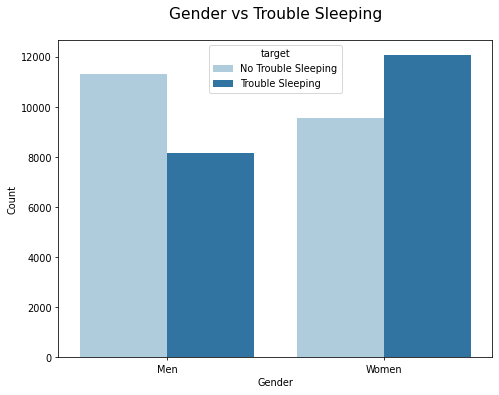

In [ ]:
# Trouble sleeping based on gender.
fig,cplt = plt.subplots(figsize = (8,6), dpi = 70)
cplt.set_title('Gender vs Trouble Sleeping', fontsize = 16, y =1.05);
ax=sns.countplot(x=cchs_df.sex.transform(lambda x: "Men"if x == 1 else "Women"), 
              hue=cchs_df.target.transform(lambda x: "Trouble Sleeping "if x == 1 else "No Trouble Sleeping"),
              data=cchs_df, 
              palette="Paired")
ax.set(xlabel='Gender', ylabel='Count')
plt.show()

**This shows that women have more trouble sleeping than men.**

In [ ]:
def marital_status(maritul_status_code):
  """ This function return the recoded Marital Status"""
  if maritul_status_code == 1:
        return "Married"
  elif maritul_status_code == 2:
      return "Common-Law"
  elif maritul_status_code == 3:
      return "Wid/Div/Sep"
  else:
      return 'Single'

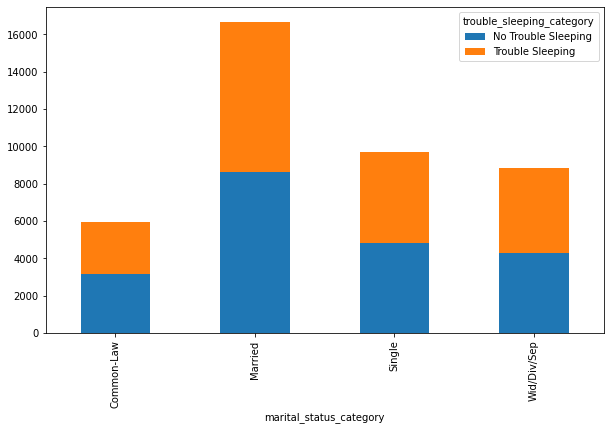

In [ ]:
# Trouble sleeping for each category of marital status.
cchs_df['marital_status_category']=cchs_df['marital_status'].apply(marital_status)
cchs_df['trouble_sleeping_category']=cchs_df.target.transform(lambda x: "Trouble Sleeping "if x == 1 else "No Trouble Sleeping")
cchs_df.groupby(['marital_status_category','trouble_sleeping_category']).size().unstack().plot(kind='bar',figsize = (10,6), stacked=True)

In [ ]:
#drop the new columns created for descriptive statistics purpose
cchs_df.drop(columns=['marital_status_category','trouble_sleeping_category'], inplace=True)

**This shows that trouble sleeping didn't vary much based on marital status.**

In [ ]:
#Correlation between variables
corr_spearman = cchs_df.corr('spearman')
corr_spearman.style.background_gradient(cmap='coolwarm')

,sex,marital_status,household_size,kids_6t011,kids_under_12,Kids_under_6,age,individual_education_level,household_education_level,perceived_general_health,perceived_mental_health,satisfaction_w_life,bmi,has_asthma,has_COPD,has_arthritis,has_high_blood_pressure,has_heart_disease,has_diabetes,has_cancer,has_mood_disorder,has_anxiety_disorder,sleep_hours_per_night,type_of_smoker,type_of_drinker,physical_activity_indicator,household_own,immigrant_status,race,household_income,personal_income,target
sex,1.000000,0.014523,-0.008981,0.034206,0.036124,0.019348,0.040456,-0.001960,-0.019691,0.005632,0.048593,-0.013068,-0.128499,-0.047086,-0.026235,-0.097154,0.002437,0.029929,0.046929,0.004798,-0.079203,-0.085823,0.041077,0.066793,0.121315,0.075458,0.014388,0.002660,-0.006258,-0.071585,-0.202635,0.138020
marital_status,0.014523,1.000000,-0.475936,-0.152658,-0.206940,-0.180040,-0.205677,-0.070766,-0.141436,0.041629,0.103272,0.141572,-0.077870,-0.039290,0.227795,0.039623,0.060748,0.010344,0.025580,0.021128,-0.083512,-0.084139,-0.011901,-0.156751,0.016356,-0.021947,0.307413,0.104919,-0.037441,-0.331757,-0.059144,0.024829
household_size,-0.008981,-0.475936,1.000000,0.489558,0.600028,0.446796,-0.394583,0.100516,0.270350,-0.131049,-0.049232,-0.114822,-0.003814,0.026187,0.210483,0.195665,0.165880,0.111067,0.095548,0.047909,0.056469,0.029969,0.003867,0.075124,-0.049163,-0.080106,-0.242700,-0.098055,0.153437,0.445425,-0.081893,-0.039871
kids_6t011,0.034206,-0.152658,0.489558,1.000000,0.771573,0.295605,-0.257246,0.098079,0.105089,-0.070137,0.001074,-0.026118,0.002664,0.010216,0.027041,0.134634,0.128226,0.073791,0.074034,0.039632,0.002622,0.002553,-0.021933,0.007311,-0.014987,-0.056710,-0.054978,-0.069028,0.094523,0.134129,0.030749,-0.021843
kids_under_12,0.036124,-0.206940,0.600028,0.771573,1.000000,0.733366,-0.382669,0.129876,0.142932,-0.100482,-0.009328,-0.049507,-0.010420,0.013642,0.172012,0.185591,0.179765,0.098849,0.099267,0.051569,0.016668,0.005933,-0.043792,0.012888,-0.018199,-0.060753,-0.054142,-0.088286,0.120703,0.173852,0.031476,-0.033823
Kids_under_6,0.019348,-0.180040,0.446796,0.295605,0.733366,1.000000,-0.325777,0.094427,0.107863,-0.085656,-0.018939,-0.051907,-0.015987,0.014166,0.234009,0.150110,0.144851,0.076930,0.077399,0.038518,0.027286,0.008712,-0.046462,0.013561,0.000723,-0.031294,-0.026602,-0.075770,0.100503,0.126652,0.003784,-0.037860
age,0.040456,-0.205677,-0.394583,-0.257246,-0.382669,-0.325777,1.000000,-0.182535,-0.237847,0.186844,-0.045882,0.007025,0.098974,0.006062,-0.697534,-0.403923,-0.389848,-0.228699,-0.217069,-0.115878,0.034356,0.073640,0.029321,0.103809,0.144635,0.232284,-0.114408,0.055462,-0.194895,-0.213717,0.018846,0.008232
individual_education_level,-0.001960,-0.070766,0.100516,0.098079,0.129876,0.094427,-0.182535,1.000000,0.791903,-0.169801,-0.078799,-0.056384,-0.049737,0.023381,0.065403,0.128251,0.118803,0.070660,0.089584,0.024973,0.026091,0.028380,0.015153,0.108390,-0.153492,-0.162687,-0.114102,-0.086158,0.074946,0.248067,0.283486,-0.001630
household_education_level,-0.019691,-0.141436,0.270350,0.105089,0.142932,0.107863,-0.237847,0.791903,1.000000,-0.174208,-0.080022,-0.081338,-0.042987,0.025380,0.127438,0.145527,0.129225,0.080607,0.091943,0.032233,0.033991,0.026211,0.023873,0.108126,-0.149913,-0.165077,-0.177335,-0.081218,0.089230,0.344700,0.191282,-0.002351
perceived_general_health,0.005632,0.041629,-0.131049,-0.070137,-0.100482,-0.085656,0.186844,-0.169801,-0.174208,1.000000,0.428962,0.415362,0.180245,-0.129006,-0.184526,-0.265203,-0.239567,-0.202167,-0.216394,-0.114284,-0.218587,-0.177928,-0.093179,-0.121488,0.173275,0.191747,0.101097,0.004569,-0.009337,-0.204649,-0.157686,0.168304


**we can see that trouble sleeping (target) has some correlation with sex, sleep hours, mood disorder, anxiety disorder, perceived general health, perceived mental health, satisfaction with life**.

# Hypothesis Testing

**Is there any difference in trouble sleeping between men and women?**

**Hypothesis**  
H0= There is no difference in having trouble sleeping between men and women  
H1= There is difference.

For hypothesis testing the chi-square test for homogeneity has been conducted


In [ ]:
cchs_df_chitest = pd.DataFrame(pd.crosstab(index=cchs_df['target'],columns=cchs_df['sex']))
print(cchs_df_chitest)
arr = cchs_df_chitest.to_numpy()
arr = np.concatenate((arr, (arr.sum(axis=1)[0]/arr.sum() * arr.sum(axis=0)).reshape(1,-1)))
arr = np.concatenate((arr, (arr.sum(axis=1)[1]/arr.sum() * arr.sum(axis=0)).reshape(1,-1)))
print('arr:',arr)

sex         1      2
target              
0       11322   9578
1        8176  12068
arr: [[11322.          9578.        ]
 [ 8176.         12068.        ]
 [ 9904.43807116 10995.56192884]
 [ 9593.56192884 10650.43807116]]


In [ ]:
chi_sq_statistic = np.sum((arr[2] - arr[0])**2/arr[2]) + np.sum((arr[3] - arr[1])**2/arr[3])
p_value = 1-chi2.cdf(chi_sq_statistic, df =1*1)#df=Degree of Freedom

In [ ]:
if p_value < 0.05:
    print('Reject H0')
else:
    print('Fail to reject H0')

Reject H0


**We can reject the null hypothesis that there is no difference in trouble sleeping between men and women.**

# Machine Learning 

## Evaluation Functions

In [ ]:
##function for model evaluation
def evaluate_results(testLabels, TestPred):
    accuracy = round(accuracy_score(testLabels, TestPred), 4)
    recall = np.round(recall_score(testLabels, TestPred, average = None), 4)
    prec = np.round(precision_score(testLabels, TestPred, average = None), 4)
    
    recallAvg = np.round(recall_score(testLabels, TestPred, average = 'weighted'), 4)
    precAvg = np.round(precision_score(testLabels, TestPred, average = 'weighted'), 4)
    summaryReport = classification_report(testLabels, TestPred, digits = 4)

    print('\n')
    print(summaryReport)

    print('\n')
    print("accuracy" + '\t' + str(accuracy))
    print("recall" + '\t\t' + str(recall[0]) + '\t' + str(recall[1]) + '\t' + str(recallAvg))
    print("prec" + '\t\t' + str(prec[0]) + '\t' + str(prec[1]) + '\t' + str(precAvg))

## Train Test Split

In [ ]:
# setting the random state to 42 which means the results will be the same each time I run the split for reproducible results.
train_x, test_x, train_y, test_y = train_test_split(cchs_df.drop("target", axis=1), cchs_df['target'], test_size = 0.20, random_state = 42)

print('Training instances Shape:', train_x.shape)
print('Training Labels Shape:', train_y.shape)
print('Testing instances Shape:', test_x.shape)
print('Testing Labels Shape:', test_y.shape)

Training instances Shape: (32915, 31)
Training Labels Shape: (32915,)
Testing instances Shape: (8229, 31)
Testing Labels Shape: (8229,)


## Feature selection

In [ ]:
train_x.reset_index(drop=True, inplace=True)

**Feature selection with  Mutual Info**

In [ ]:
def select_features(train_x, train_y,no_features):
    """ this function return top features based on Mutual information gain """
    mi_score = mutual_info_classif(train_x,train_y, random_state = 1)
    mi_sorted=pd.Series(mi_score,train_x.columns).sort_values(ascending=False).nlargest(n=no_features)
    return mi_sorted.index,mi_sorted

In [ ]:
def data_on_selected_features(x, features_index):
    return x[features_index]
	

In [ ]:
features_index, mi_info=select_features(train_x, train_y, 5)

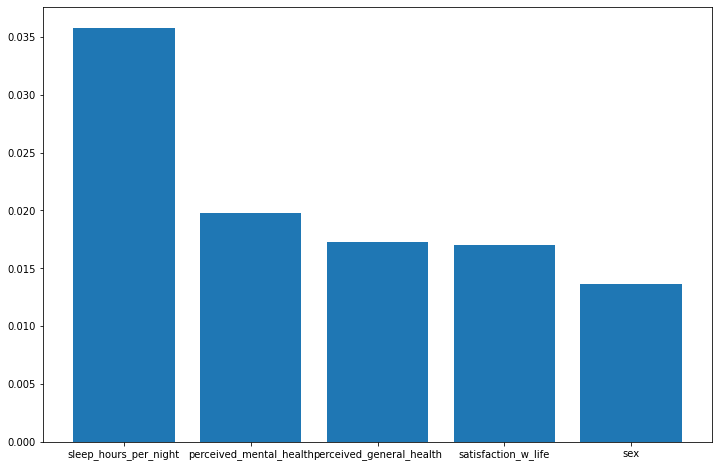

In [ ]:
plt.figure(figsize=(12,8))
plt.bar([i for i in range(len(features_index))], mi_info, tick_label=features_index)
plt.show()

**Extract training and testing Data on selected features**

In [ ]:
fs_train_x=data_on_selected_features(train_x,features_index)
fs_test_x=data_on_selected_features(test_x,features_index)

## Machine Learning Models

### Logistic Regression

In [ ]:
#logistic regression classification with selected features
clf = LogisticRegression(solver='liblinear')
model = clf.fit(fs_train_x,train_y)
test_predictions = model.predict(fs_test_x)
evaluate_results(test_y, test_predictions)



              precision    recall  f1-score   support

           0     0.6430    0.6993    0.6700      4167
           1     0.6611    0.6017    0.6300      4062

    accuracy                         0.6511      8229
   macro avg     0.6520    0.6505    0.6500      8229
weighted avg     0.6519    0.6511    0.6502      8229



accuracy	0.6511
recall		0.6993	0.6017	0.6511
prec		0.643	0.6611	0.6519


In [ ]:
# Coefficients for Logistic Regression
print("Coefficients : ",clf.coef_)
print("Intercepts : ",clf.intercept_)
#coefficients = pd.concat([pd.DataFrame(df2.columns),pd.DataFrame(np.transpose(clf.coef_))], axis = 1)
#print(coefficients)

Coefficients :  [[-0.39932845  0.25602183  0.156556    0.23868961  0.63009068]]
Intercepts :  [-0.01928921]


### Decision Tree

In [ ]:
#DT classification
clf = DecisionTreeClassifier()
model = clf.fit(fs_train_x, train_y)
test_predictions = model.predict(fs_test_x)
evaluate_results(test_y, test_predictions)



              precision    recall  f1-score   support

           0     0.6289    0.7173    0.6702      4167
           1     0.6611    0.5657    0.6097      4062

    accuracy                         0.6425      8229
   macro avg     0.6450    0.6415    0.6399      8229
weighted avg     0.6448    0.6425    0.6403      8229



accuracy	0.6425
recall		0.7173	0.5657	0.6425
prec		0.6289	0.6611	0.6448


### Random Forest

In [ ]:
#RF classification
clf = RandomForestClassifier()
model = clf.fit(fs_train_x, train_y)
test_predictions = model.predict(fs_test_x)
evaluate_results(test_y, test_predictions)



              precision    recall  f1-score   support

           0     0.6351    0.7029    0.6673      4167
           1     0.6577    0.5857    0.6196      4062

    accuracy                         0.6450      8229
   macro avg     0.6464    0.6443    0.6434      8229
weighted avg     0.6463    0.6450    0.6437      8229



accuracy	0.645
recall		0.7029	0.5857	0.645
prec		0.6351	0.6577	0.6463


### KNN classification

In [ ]:
clf = KNeighborsClassifier(n_neighbors=2)
model = clf.fit(fs_train_x, train_y)
test_predictions = model.predict(fs_test_x)
evaluate_results(test_y, test_predictions)



              precision    recall  f1-score   support

           0     0.5766    0.7617    0.6563      4167
           1     0.6355    0.4261    0.5102      4062

    accuracy                         0.5961      8229
   macro avg     0.6060    0.5939    0.5832      8229
weighted avg     0.6056    0.5961    0.5842      8229



accuracy	0.5961
recall		0.7617	0.4261	0.5961
prec		0.5766	0.6355	0.6056


### Neural Networks//MLP 

In [ ]:
clf = MLPClassifier(solver='adam', learning_rate_init = 0.0005, learning_rate = 'adaptive', activation="relu", max_iter=1000, random_state=42)
model = clf.fit(fs_train_x, train_y)
test_predictions = model.predict(fs_test_x)
evaluate_results(test_y, test_predictions)



              precision    recall  f1-score   support

           0     0.6280    0.7641    0.6894      4167
           1     0.6888    0.5357    0.6027      4062

    accuracy                         0.6514      8229
   macro avg     0.6584    0.6499    0.6460      8229
weighted avg     0.6580    0.6514    0.6466      8229



accuracy	0.6514
recall		0.7641	0.5357	0.6514
prec		0.628	0.6888	0.658


##Model Comparison:




Model  | Accuracy 
--------------------------|------------------
Logistic Regression       | 0.6511 
Decision Tree             | 0.6425 
Random Forest             | 0.6445 
KNN                       | 0.5961
Neural Networks(MLP)      | 0.6514

**From the model comparison we can see that logistic regression and neural networks models are performing relatively better than other classifiers in terms of clssifying the probabilities of having trouble sleeping based on the selected predictors.**

**References**   
- Medic, G., Wille, M., & Hemels, M. E. H. (2017). Short- and long-term health
consequences of sleep disruption. In Nature and Science of Sleep (Vol. 9, pp. 151–161). Dove Medical Press Ltd. https://doi.org/10.2147/NSS.S134864  

- https://towardsdatascience.com/inference-for-categorical-data-9f3c6034aa57    

- **Data source:** Statistics Canada. 2018. Canadian Community Health Survey (CCHS), 2017-2018, (subset compiled from public-use microdata file). Statistics Canada (producer). Using IDLS (distributor). http://janus.ssc.uwo.ca/idls/ (accessed October 16, 2020). 